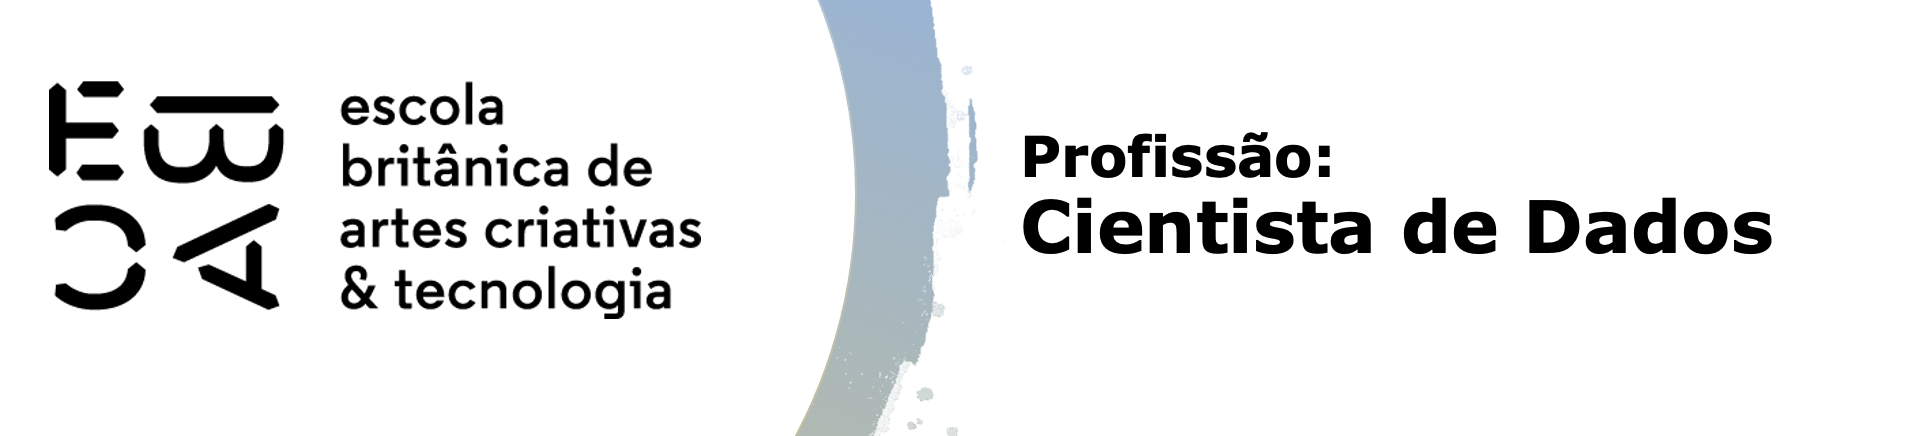

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

In [2]:
X_train = pd.read_csv('./X_train.csv')
X_test = pd.read_csv('./X_test.csv')
y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)
y_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt', header=None, delim_whitespace=True)

In [3]:
X_train.set_index(['subject', X_train.index], inplace=True)
X_test.set_index(['subject', X_test.index], inplace=True)

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamos acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [4]:
X_train1 = X_train[['tGravityAcc-min()-X','tBodyAcc-mean()-Y','tGravityAcc-mean()-Y']]
X_test1 = X_test[['tGravityAcc-min()-X','tBodyAcc-mean()-Y','tGravityAcc-mean()-Y']]

In [5]:
clf = DecisionTreeClassifier(random_state=77,min_samples_leaf=20 )
caminho = clf.cost_complexity_pruning_path(X_train1, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [6]:
# verificando se os ccp_alphas são únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

array([0.00000000e+00, 1.86387063e-06, 7.31429279e-06, 7.81376612e-06,
       8.26772494e-06, 8.86174036e-06, 1.04385454e-05, 1.05451700e-05,
       1.29749327e-05, 1.95949806e-05, 2.04404642e-05, 3.17373957e-05,
       3.50172482e-05, 4.08052231e-05, 4.20058413e-05, 4.22319791e-05,
       4.76060936e-05, 5.26744411e-05, 5.56549752e-05, 5.80340950e-05,
       6.18835046e-05, 7.48335953e-05, 7.57811286e-05, 7.68851064e-05,
       8.72738611e-05, 9.20898856e-05, 9.46356913e-05, 9.99326483e-05,
       1.01676986e-04, 1.02434877e-04, 1.06093580e-04, 1.10164750e-04,
       1.24357577e-04, 1.38919298e-04, 1.40891058e-04, 1.43159065e-04,
       1.43473881e-04, 1.45059862e-04, 1.50776081e-04, 1.54753374e-04,
       1.58291120e-04, 1.62411159e-04, 1.74203039e-04, 1.75746978e-04,
       1.81356547e-04, 1.84521838e-04, 1.89514481e-04, 1.90891101e-04,
       1.99666583e-04, 1.99983640e-04, 2.07721478e-04, 2.20481958e-04,
       2.29639784e-04, 2.40448027e-04, 2.54663778e-04, 2.66205503e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [ ]:
%%time


In [7]:
# Criando dicionario para utilizar depois os valor de ccp_alpha 
grid_param = {'ccp_alpha':ccp_alphas}
grid_param

{'ccp_alpha': array([0.00000000e+00, 1.86387063e-06, 7.31429279e-06, 7.81376612e-06,
        8.26772494e-06, 8.86174036e-06, 1.04385454e-05, 1.05451700e-05,
        1.29749327e-05, 1.95949806e-05, 2.04404642e-05, 3.17373957e-05,
        3.50172482e-05, 4.08052231e-05, 4.20058413e-05, 4.22319791e-05,
        4.76060936e-05, 5.26744411e-05, 5.56549752e-05, 5.80340950e-05,
        6.18835046e-05, 7.48335953e-05, 7.57811286e-05, 7.68851064e-05,
        8.72738611e-05, 9.20898856e-05, 9.46356913e-05, 9.99326483e-05,
        1.01676986e-04, 1.02434877e-04, 1.06093580e-04, 1.10164750e-04,
        1.24357577e-04, 1.38919298e-04, 1.40891058e-04, 1.43159065e-04,
        1.43473881e-04, 1.45059862e-04, 1.50776081e-04, 1.54753374e-04,
        1.58291120e-04, 1.62411159e-04, 1.74203039e-04, 1.75746978e-04,
        1.81356547e-04, 1.84521838e-04, 1.89514481e-04, 1.90891101e-04,
        1.99666583e-04, 1.99983640e-04, 2.07721478e-04, 2.20481958e-04,
        2.29639784e-04, 2.40448027e-04, 2.54663778e

In [8]:
# Separando 10 grupos devido ao custo computacional 
grid = GridSearchCV(estimator = clf, param_grid=grid_param,cv=10, verbose=1)
grid.fit(X_train1, y_train) 

Fitting 10 folds for each of 173 candidates, totalling 1730 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=77),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.86387063e-06, 7.31429279e-06, 7.81376612e-06,
       8.26772494e-06, 8.86174036e-06, 1.04385454e-05, 1.05451700e-05,
       1.29749327e-05, 1.95949806e-05, 2.04404642e-05, 3.17373957e-05,
       3.50172482e-05, 4.08052231e-05, 4.20058413e-05, 4.223...
       1.84331711e-03, 1.97125672e-03, 1.98641792e-03, 2.06164983e-03,
       2.30499302e-03, 2.35793171e-03, 2.36903049e-03, 2.38818041e-03,
       2.55514048e-03, 2.98876834e-03, 3.37985549e-03, 3.43113353e-03,
       3.56021627e-03, 3.64448027e-03, 4.03702726e-03, 4.72458819e-03,
       6.67210359e-03, 6.96230299e-03, 7.42357254e-03, 8.24090662e-03,
       1.27745286e-02, 1.91654210e-02, 3.64385363e-02, 1.04411041e-01,
       1.86138242e-01])},
             verbose=1)

In [9]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.112930,0.014259,0.014058,0.004182,0.0,{'ccp_alpha': 0.0},0.664402,0.566576,0.617687,0.548299,0.570068,0.560544,0.636735,0.579592,0.634014,0.564626,0.594254,0.038141,61
1,0.098339,0.012993,0.009994,0.001844,0.000002,{'ccp_alpha': 1.8638706285462048e-06},0.664402,0.566576,0.617687,0.548299,0.570068,0.560544,0.636735,0.579592,0.634014,0.564626,0.594254,0.038141,61
2,0.113728,0.048780,0.010894,0.003046,0.000007,{'ccp_alpha': 7.314292791613889e-06},0.664402,0.566576,0.617687,0.548299,0.570068,0.560544,0.636735,0.579592,0.634014,0.564626,0.594254,0.038141,61
3,0.096040,0.004274,0.009994,0.001548,0.000008,{'ccp_alpha': 7.813766119510403e-06},0.664402,0.566576,0.617687,0.548299,0.570068,0.560544,0.636735,0.579592,0.634014,0.564626,0.594254,0.038141,61
4,0.096439,0.003072,0.010194,0.001399,0.000008,{'ccp_alpha': 8.267724935458784e-06},0.664402,0.566576,0.617687,0.548299,0.570068,0.560544,0.636735,0.579592,0.634014,0.564626,0.594254,0.038141,61


In [10]:
#Melhor acurácia encontrada
grid.best_score_

0.6015982697426796

In [11]:
#Melhor score
grid.best_index_

162

In [12]:
melhor_ccp = resultados.iloc[grid.best_index_,4]
melhor_ccp

0.004037027259998487

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [13]:
clf = DecisionTreeClassifier(random_state=77,min_samples_leaf=20, ccp_alpha = 0.004037027259998487 ).fit(X_train1, y_train)

In [14]:
clf.score(X_test1, y_test)

0.5453003053953173

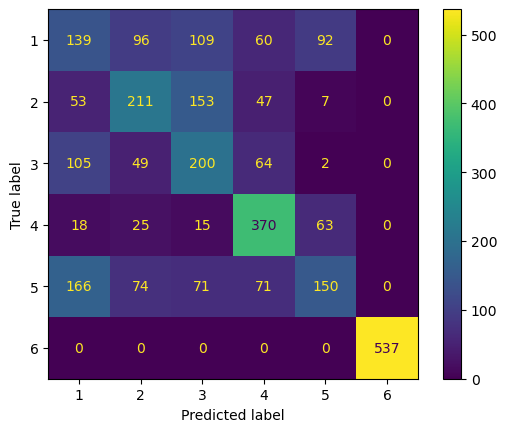

In [15]:
ConfusionMatrixDisplay.from_estimator(
    clf, X_test1, y_test)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [16]:
#  'classe_de_maior_erro' é a variavel que o modelo mais errou de acordo com a matriz de confusão
classe_de_maior_erro = 5
y_binario = np.where(y_train == classe_de_maior_erro, 1, 0)

In [17]:
clf_erro = DecisionTreeClassifier(random_state=77,min_samples_leaf=20,max_depth=4 ).fit(X_train, y_binario)

In [18]:
#extraindo o nome das colunas
feature_names = X_train.columns
# achando os mais importantes
importance_sorted = sorted(zip(clf_erro.feature_importances_, feature_names), reverse=True)
importance_sorted

[(0.32804818245537903, 'tGravityAcc-mean()-Y'),
 (0.3018506674740763, 'fBodyAcc-skewness()-X'),
 (0.13043123942503584, 'fBodyAccJerk-bandsEnergy()-9,16.2'),
 (0.04654981408087569, 'tGravityAcc-max()-Y'),
 (0.04418019639890531, 'tBodyAcc-correlation()-X,Z'),
 (0.033659984227453275, 'tGravityAcc-energy()-X'),
 (0.032746723704401626, 'Unnamed: 1'),
 (0.024606829324220904, 'tGravityAcc-min()-Y'),
 (0.021091628795784287, 'fBodyAcc-max()-X'),
 (0.0201856488781045, 'fBodyGyro-bandsEnergy()-25,32'),
 (0.011792089551283512, 'tBodyGyro-min()-X'),
 (0.004856995684479514, 'fBodyAcc-kurtosis()-Z'),
 (0.0, 'tGravityAccMag-std()'),
 (0.0, 'tGravityAccMag-sma()'),
 (0.0, 'tGravityAccMag-min()'),
 (0.0, 'tGravityAccMag-mean()'),
 (0.0, 'tGravityAccMag-max()'),
 (0.0, 'tGravityAccMag-mad()'),
 (0.0, 'tGravityAccMag-iqr()'),
 (0.0, 'tGravityAccMag-entropy()'),
 (0.0, 'tGravityAccMag-energy()'),
 (0.0, 'tGravityAccMag-arCoeff()4'),
 (0.0, 'tGravityAccMag-arCoeff()3'),
 (0.0, 'tGravityAccMag-arCoeff()2'),


In [19]:
# colocando apenas as variaveis importantes.

X_train2=X_train[['tGravityAcc-min()-X','tBodyAcc-mean()-Y','fBodyAccJerk-bandsEnergy()-9,16.2']]
X_test2=X_test[['tGravityAcc-min()-X','tBodyAcc-mean()-Y','fBodyAccJerk-bandsEnergy()-9,16.2']]

In [20]:
clf_erro2 = DecisionTreeClassifier(random_state=77,min_samples_leaf=20,max_depth=4 ).fit(X_train2, y_train)

In [21]:
clf_erro2.score(X_test2, y_test)

0.5992534781133356

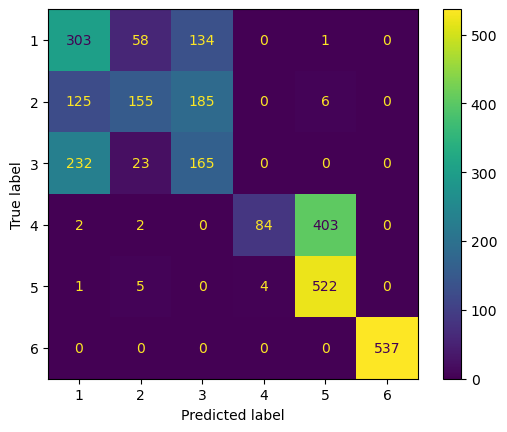

In [22]:
ConfusionMatrixDisplay.from_estimator(
    clf_erro2, X_test2, y_test)
plt.show()

A variavel 5 teve um resultado bem melhor com os novos parametros.